In [4]:
import sklearn 
import os, sys
import pyreadr
import pandas as pd
import catboost
import seaborn as sns
from matplotlib import pyplot as plt
work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/cv_surgery'
exec(open(work_dir+'/code/Python/snippets/helpful_functions.py').read())


In [5]:
outcome = 'readmit'
name_outcome = 'Readmission'


In [6]:
load_dir = work_dir+'/csv_files/pre_anat_intra'
#decouple_var_imp_sort.to_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcome+'.csv', index=False)
vimp = pd.read_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcome+'.csv')

In [7]:
vimp

,Feature Id,total_importance,min_max_scale_importance
0,age,4.984308,1.000000
1,lwsttemp,4.407969,0.884369
2,wbc,4.385103,0.879782
3,pasys,4.332720,0.869272
4,rfhemoglobin,4.276628,0.858018
...,...,...,...
173,endotreat,0.133724,0.026829
174,pv,0.119812,0.024038
175,pneumnow,0.050420,0.010116
176,endoactive,0.021655,0.004345


In [12]:
var_dict = pd.read_excel(load_dir+'/'+'MCSQI variables (1).xlsx')
var_dict

,Variable Category,Variable Name,label,Miss,Non-missing values count,"Categorical=0, Continuous =1, Categorical in this context means 'there are fewer than 6 unique values'",mean,sd,25th percentile,median,75th percentile,=0,=1,=2,=3,=4,=5,=6,=7
0,NaN,datavrsn,ACSD data collection version,N,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,NaN,patid,Unique patient ID,N,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,NaN,recordid,Unique procedure identifier,N,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,preoperative,proctype,Type of procedure,N,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.
4,preoperative,gender,Sex,N,0.999871,0,.,.,.,.,.,.,26146,12552,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,intraoperative,nc_stern,Sternotomy,R,0.998526,0,.,.,.,.,.,.,4262,34354,.,.,.,.,.
208,intraoperative,cplegia_ant,Antegrade cardioplegia,R,0.998319,0,.,.,.,.,.,.,31934,6674,.,.,.,.,.
209,intraoperative,cplegia_ret,Retrograde cardioplegia,R,0.998319,0,.,.,.,.,.,.,14286,24322,.,.,.,.,.
210,intraoperative,frepl,Intraoperative clotting factors,V,0.615701,0,.,.,.,.,.,.,283,23528,.,.,.,.,.


In [14]:
vimp2 = pd.merge(var_dict[['Variable Category','Variable Name', 'label']],vimp,left_on='Variable Name',right_on='Feature Id', how = 'right')
vimp2

,Variable Category,Variable Name,label,Feature Id,total_importance,min_max_scale_importance
0,preoperative,age,Age at procedure (years),age,5.574022,1.000000
1,preoperative,wbc,White blood cell count,wbc,5.252116,0.942125
2,intraoperative,highintraglu,Highest intraoperative glucose,highintraglu,4.752648,0.852325
3,intraoperative,lwsthct,Lowest intraoperative hematocrit,lwsthct,4.605395,0.825851
4,intraoperative,lwstintrahemo,Lowest intraoperative hemoglobin,lwstintrahemo,4.551415,0.816146
...,...,...,...,...,...,...
173,preoperative,pneumnow,Recent pneumonia,pneumnow,0.149216,0.024675
174,preoperative,endotreat,Treated endocarditis at the time of surgery,endotreat,0.089064,0.013860
175,preoperative,pneumpast,Remote pneumonia,pneumpast,0.081722,0.012540
176,preoperative,proctype,Type of procedure,proctype,0.023494,0.002071


OUTCOME:
sts_mort
  Variable Category Variable Name                           label Feature Id  \
0      preoperative           age        Age at procedure (years)        age   
1    intraoperative       ibdrbcu  Red blood cells intraoperative    ibdrbcu   
2      preoperative       meldscr         Preoperative MELD score    meldscr   
3    intraoperative      perfustm          Cardiac perfusion time   perfustm   
4    intraoperative      iabp_iop             Intraoperative IABP   iabp_iop   

   total_importance  min_max_scale_importance  
0          6.397134                  1.000000  
1          5.886131                  0.919942  
2          5.009674                  0.782629  
3          4.907660                  0.766646  
4          4.483846                  0.700248  
OUTCOME:
sts_mmom
  Variable Category Variable Name                     label Feature Id  \
0    intraoperative      perfustm    Cardiac perfusion time   perfustm   
1      preoperative       meldscr   Preoperativ

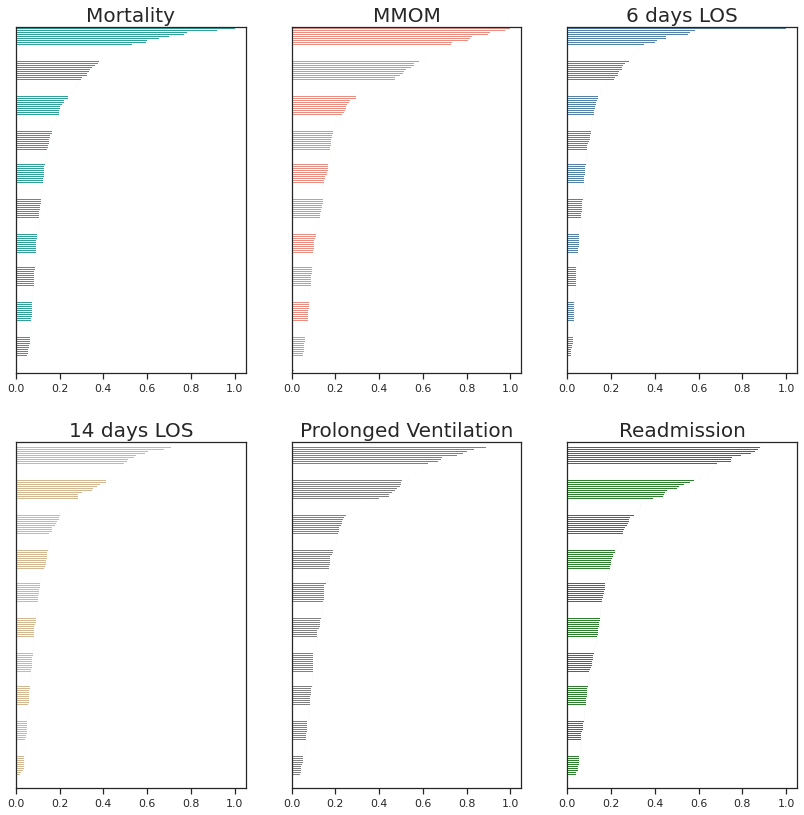

In [16]:
fig, ax = plt.subplots(figsize=(7*2,7*2))
ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.set_ylabel('')  
ax.set_xlabel('') 
ax.axis("off")


sns.set(font_scale = 3)
sns.set_style("white")
sns.set_theme(style="ticks", color_codes=True)

nrows = 2
ncols = 3
axes = [ fig.add_subplot(nrows, ncols, r * ncols + c+1) for r in range(nrows) for c in range(ncols) ]
outcomes = ['sts_mort', 'sts_mmom', 'sts_6d', 'sts_14d', 'cpvntlng', 'readmit']
name_outcomes = ['Mortality', 'MMOM', '6 days LOS', '14 days LOS', 'Prolonged Ventilation', 'Readmission']
colors = ['lightseagreen','salmon','steelblue','burlywood','grey','forestgreen']

outcome_count = 0
for sub_ax in axes:
    print('OUTCOME:')
    print(outcomes[outcome_count])
    vimp = pd.read_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcomes[outcome_count]+'.csv')
    vimp = pd.merge(var_dict[['Variable Category','Variable Name', 'label']],vimp,left_on='Variable Name',right_on='Feature Id', how = 'right')

    print(vimp.iloc[:5,:])
    sns.barplot(x="min_max_scale_importance", y="Feature Id", data=vimp, color=colors[outcome_count], ax = sub_ax)
    sub_ax.set_yticks([])
    sub_ax.set_ylabel('')  
    sub_ax.set_xlabel('')    
    sub_ax.set_title(name_outcomes[outcome_count], fontsize = 20)
    outcome_count += 1






In [17]:
fig.savefig('VIMP Figure.png')


OUTCOME:
sts_reop
  Variable Category  Variable Name                              label  \
0    intraoperative           ppef   Ejection fraction post-procedure   
1    intraoperative        lwsthct   Lowest intraoperative hematocrit   
2    intraoperative  lwstintrahemo   Lowest intraoperative hemoglobin   
3    intraoperative       lwsttemp  Lowest intraoperative temperature   
4      preoperative      platelets        Preoperative platelet count   

      Feature Id  total_importance  min_max_scale_importance  
0           ppef          4.226409                  1.000000  
1        lwsthct          4.173099                  0.987386  
2  lwstintrahemo          4.109405                  0.972316  
3       lwsttemp          3.756780                  0.888882  
4      platelets          3.719076                  0.879961  
OUTCOME:
crenfail
  Variable Category Variable Name                           label  \
0      preoperative      creatlst   Preoperative creatinine level   
1    intr

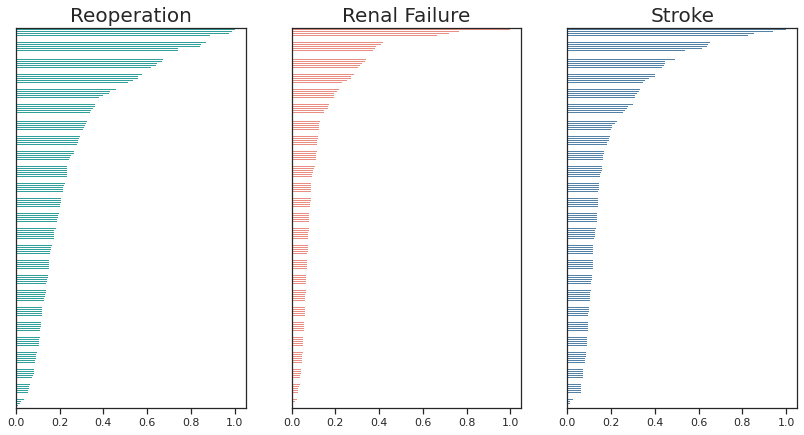

In [18]:
fig, ax = plt.subplots(figsize=(7*2,7))
ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.set_ylabel('')  
ax.set_xlabel('') 
ax.axis("off")


sns.set(font_scale = 3)
sns.set_style("white")
sns.set_theme(style="ticks", color_codes=True)

nrows = 1
ncols = 3
axes = [ fig.add_subplot(nrows, ncols, r * ncols + c+1) for r in range(nrows) for c in range(ncols) ]
outcomes = ['sts_reop', 'crenfail', 'cnstrokp']
name_outcomes = ['Reoperation', 'Renal Failure', 'Stroke']
colors = ['lightseagreen','salmon','steelblue']

outcome_count = 0
for sub_ax in axes:
    print('OUTCOME:')
    print(outcomes[outcome_count])
    vimp = pd.read_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcomes[outcome_count]+'.csv')
    vimp = pd.merge(var_dict[['Variable Category','Variable Name', 'label']],vimp,left_on='Variable Name',right_on='Feature Id', how = 'right')

    print(vimp.iloc[:5,:])
    sns.barplot(x="min_max_scale_importance", y="Feature Id", data=vimp, color=colors[outcome_count], ax = sub_ax)
    sub_ax.set_yticks([])
    sub_ax.set_ylabel('')  
    sub_ax.set_xlabel('')    
    sub_ax.set_title(name_outcomes[outcome_count], fontsize = 20)
    outcome_count += 1






In [19]:
fig.savefig('VIMP Figure_supplement.png')
